# Preços de Combustíveis - Dados históricos

Em cumprimento às determinações da Lei do Petróleo (Lei nº 9478/1997, artigo 8º), a ANP acompanha os preços praticados por revendedores de combustíveis automotivos e de gás liquefeito de petróleo envasilhado em botijões de 13 quilos (GLP P13), por meio de uma pesquisa semanal de preços realizada por empresa contratada.


#### Organização
Agência Nacional do Petróleo, Gás Natural e Biocombustíveis (ANP)

#### Cobertura temporal
2004 - 2021

#### Descrição
Série Histórica de Preços de Combustíveis - a saber, gasolina, gasolina aditivada, etanol, diesel s10, diesel, gnv e glp - com base na pesquisa de preços da Agência Nacional do Petróleo, Gás Natural e Biocombustíveis realizada a partir da primeira semana de 2004 até os dias de hoje.

Fonte: https://basedosdados.org/dataset/br-anp-precos-combustiveis?bdm_table=microdados

In [1]:
# Importando os pacotes necessários
import basedosdados as bd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import squarify

%matplotlib inline
sns.set_palette('Greens_r')

In [2]:
# Para carregar os dados direto no pandas
df = bd.read_table(dataset_id='br_anp_precos_combustiveis',
table_id='microdados',
billing_project_id="base-dados-org", limit= 2000000)

Downloading: 100%|███████████████████████████████████████████████████████| 2000000/2000000 [10:18<00:00, 3233.28rows/s]


Infelizmente, terei que limitar a quantidade de dados à serem analisados, pois é um dataset muito grande e minha máquina não o suporta devido as suas limitações, então serão usados 2 milhões de registros 

In [3]:
# Vendo o tipo dos dados 
df.dtypes

ano                       Int64
sigla_uf                 object
id_municipio             object
bairro_revenda           object
cep_revenda              object
endereco_revenda         object
cnpj_revenda             object
nome_estabelecimento     object
bandeira_revenda         object
data_coleta              dbdate
produto                  object
unidade_medida           object
preco_compra            float64
preco_venda             float64
dtype: object

In [4]:
# Vamos agora observar quantos valores unicos há em cada coluna 
df.nunique()

ano                        12
sigla_uf                   27
id_municipio              815
bairro_revenda          16802
cep_revenda             33629
endereco_revenda        60100
cnpj_revenda            63096
nome_estabelecimento    56009
bandeira_revenda          208
data_coleta               276
produto                     7
unidade_medida              3
preco_compra            48628
preco_venda              4653
dtype: int64

In [5]:
# Visualizando as ultimas 3 linhas
df.tail(3)

,ano,sigla_uf,id_municipio,bairro_revenda,cep_revenda,endereco_revenda,cnpj_revenda,nome_estabelecimento,bandeira_revenda,data_coleta,produto,unidade_medida,preco_compra,preco_venda
1999997,2020,MG,3127107,IPE AMARELO,38200-000,"AVENIDA PRESIDENTE JUSCELINO KUBITSCHEK,1122",25.557.208/0001-37,AUTO POSTO SIQUEIRA LTDA - EPP,BRANCA,2020-02-19,diesel s10,R$/litro,NaN,3.959
1999998,2020,RS,4314100,CENTRO,99010-070,"RUA FAGUNDES DOS REIS,125",07.473.735/0108-10,SIM REDE DE POSTOS LTDA,PETROBRAS DISTRIBUIDORA S.A.,2020-02-19,diesel s10,R$/litro,NaN,3.789
1999999,2020,PE,2616407,ZONA RURAL,55602-000,"RODOVIA LUIZ GONZAGA,S/N BR-232 ...",20.379.786/0001-07,AUTO POSTO ROTA 232 LTDA,BRANCA,2020-02-19,diesel s10,R$/litro,NaN,3.568


In [6]:
# Verificando a quantidade de valores nulos 
df.isna().sum()

ano                           0
sigla_uf                      0
id_municipio                  0
bairro_revenda             5292
cep_revenda                   0
endereco_revenda              0
cnpj_revenda                  0
nome_estabelecimento          0
bandeira_revenda              0
data_coleta                   0
produto                       0
unidade_medida                0
preco_compra            1067707
preco_venda                   0
dtype: int64

In [7]:
# Verificando a porcentagem de valores nulos por coluna 
df.apply(lambda x:100 * sum(x.isnull()/len(df)))

ano                      0.00000
sigla_uf                 0.00000
id_municipio             0.00000
bairro_revenda           0.26460
cep_revenda              0.00000
endereco_revenda         0.00000
cnpj_revenda             0.00000
nome_estabelecimento     0.00000
bandeira_revenda         0.00000
data_coleta              0.00000
produto                  0.00000
unidade_medida           0.00000
preco_compra            53.38535
preco_venda              0.00000
dtype: float64

Como podemos ser visto acima, não há muito valores ausentes. Há casos de colunas com 25% de valores ausentes e há um caso extremo de coluna com mais de 50% de seus registros ausentes. Algo terá que ser feito

In [8]:
# E o que faremos com a coluna que tem mais de 50% de valores NA é removê-la, pois eu acredito que não há utilidade em manter uma váriavel que esteja com mais de 45% dos dados ausentes
df.drop('preco_compra', inplace= True, axis = 1)

In [9]:
# Observando se a coluna foi devidamente removida
df.columns

Index(['ano', 'sigla_uf', 'id_municipio', 'bairro_revenda', 'cep_revenda',
       'endereco_revenda', 'cnpj_revenda', 'nome_estabelecimento',
       'bandeira_revenda', 'data_coleta', 'produto', 'unidade_medida',
       'preco_venda'],
      dtype='object')

 Agora vamos criar uma coluna REGIAO pois pode ser interessante compararmos as variáveis em nível de REGIÃO, não somente por estado.



In [10]:
# Primeiramente vamos criar listas que contém as sigla dos estados
norte = ['RR','AP','AM','PA','AC','RO','TO']
nordeste = ['MA','PI','CE','RN','PB','PE','AL','SE','BA']
sudeste = ['SP','MG','RG','ES']
sul = ['PR','SC','RS']
centroOeste = ['MT','DF','GO','MS']

In [11]:
# Agora vamos criar uma função, onde se a Unidade Federativa estiver em tal região
# A função vai retornar a região respectiva

def add_Regiao(uf):
    if uf in norte:        
        return 'Norte'
    if uf in nordeste:        
        return 'Nordeste'
    if uf in centroOeste:        
        return 'Centro-Oeste'
    if uf in sul:        
        return 'Sul'
    if uf in sudeste:        
        return 'Sudeste'

In [12]:
# Agora vamos usar a função map para aplicar a nossa função criada acima e consequentemente criar aa coluna Regiao
df['Regiao'] = df['sigla_uf'].map(add_Regiao)
df['Regiao'].tail()

1999995    Nordeste
1999996    Nordeste
1999997     Sudeste
1999998         Sul
1999999    Nordeste
Name: Regiao, dtype: object

## Figuras que mostrem insights sobre os dados 

In [13]:
# Definindo a paleta de cores para o treemap
cmap = matplotlib.cm.Greens
mini = min(df.sigla_uf.value_counts())
maxi = max(df.sigla_uf.value_counts())
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(i)) for i in df.sigla_uf.value_counts()]

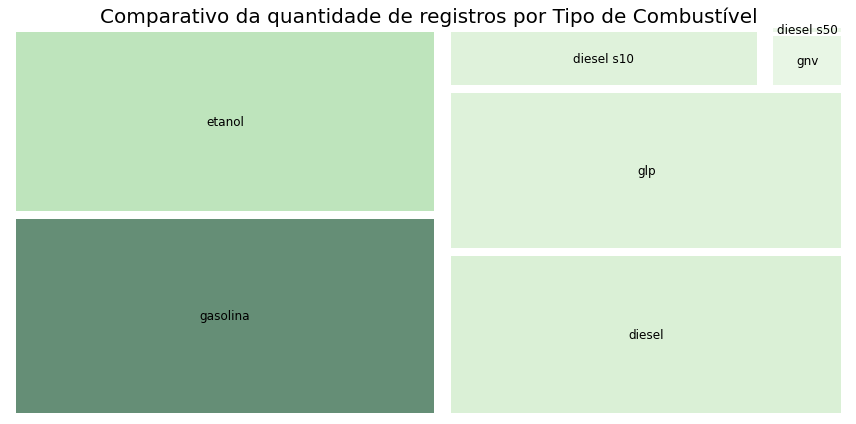

In [14]:
# Definindo o tamanho da figura
plt.figure(figsize=(12,6))

# Fazendo o Treemap
squarify.plot(sizes=df.produto.value_counts(), label=df.produto.value_counts().index,
              color=colors, pad=True, alpha=0.6, text_kwargs={'fontsize': 12});

# Adicionando um título
plt.title('Comparativo da quantidade de registros por Tipo de Combustível', fontsize=20)

# Removendo os eixos
plt.axis('off');

# Ajustando o gráfico
plt.tight_layout()


Como podemos ver no gráfico acima, a maior parte dos registros é da gasolina, seguida de perto do etanol que são os 2 combutíveis mais usados em veículos, em seguida temos o GLP, mais conhecido como gás de cozinha, também temos o diesel comum (S-500) com teor de enxofre de 500 ppm, e o S-10 com teor máximo de 10 ppm. Há também o GNV (que normalmente é mais econômico), gasolina aditivada que ajudam a manter limpo o sistema de alimentação do veículo e diesel s50, onde a ANP aprovou o seu fim com pouco tempo para consumo no Brasil

In [15]:
# Porcentagem de Registros pelo tipo de Produto
df.produto.value_counts() / len(df) * 100

gasolina      26.84760
etanol        24.86960
diesel        20.42265
glp           20.23055
diesel s10     6.04200
gnv            1.48110
diesel s50     0.10650
Name: produto, dtype: float64

<AxesSubplot:title={'center':'Porcentagem de Registro por Região'}, ylabel='Regiao'>

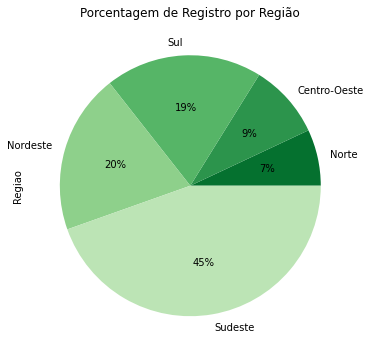

In [16]:
plt.title('Porcentagem de Registro por Região')
(df.Regiao.value_counts()/len(df)*100).sort_values().plot(kind="pie", autopct='%1.0f%%', figsize = (12,6))

A região Sudeste é a região onde há mais quantidade, o que normal, pois é a região onde se concentra a maioria das riquezas do país.

In [17]:
mean_comb_per_regiao = df.groupby(['ano','Regiao']).preco_venda.mean()
mean_comb_per_regiao

ano   Regiao      
2004  Centro-Oeste     6.349096
      Nordeste         5.355745
      Norte            7.765713
      Sudeste          5.170747
      Sul              6.227395
2005  Centro-Oeste     7.113885
      Nordeste         5.296420
      Norte            8.547003
      Sudeste          5.502399
      Sul              7.074730
2006  Centro-Oeste     6.769716
      Nordeste         5.734427
      Norte           10.626259
      Sudeste          6.581612
      Sul              6.361407
2008  Centro-Oeste    13.291110
      Nordeste         7.736259
      Norte           11.869757
      Sudeste          9.264393
      Sul             10.910364
2009  Centro-Oeste    13.072946
      Nordeste         7.977191
      Norte           11.742931
      Sudeste          9.504419
      Sul             11.133109
2010  Centro-Oeste    13.851254
      Nordeste         8.235277
      Norte           11.746173
      Sudeste         10.003578
      Sul             11.861944
2012  Centro-Oeste   

In [18]:
mean_comb_per_regiao = mean_comb_per_regiao.unstack(level='Regiao')
mean_comb_per_regiao

Regiao,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
ano,,,,,
2004,6.349096,5.355745,7.765713,5.170747,6.227395
2005,7.113885,5.296420,8.547003,5.502399,7.074730
2006,6.769716,5.734427,10.626259,6.581612,6.361407
2008,13.291110,7.736259,11.869757,9.264393,10.910364
2009,13.072946,7.977191,11.742931,9.504419,11.133109
2010,13.851254,8.235277,11.746173,10.003578,11.861944
2012,15.944362,9.317068,13.939839,11.028248,12.612969
2013,16.730997,9.930452,15.549343,11.346285,12.892412
2014,16.226521,10.713085,15.973845,11.629691,12.783233


In [19]:
# Definindo titulo e label pra deixar o código mais limpo
titulo = 'Média de Preço de Gasolina com o Passar dos Anos Por Regiao'
xlabel = 'Ano'
ylabel = 'Média de Preço do Combustível'
colormap = 'Dark2'

<AxesSubplot:title={'center':'Média de Preço de Gasolina com o Passar dos Anos Por Regiao'}, xlabel='Ano', ylabel='Média de Preço do Combustível'>

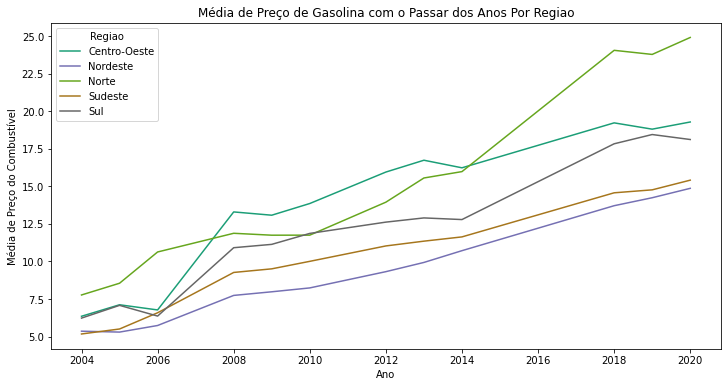

In [20]:
mean_comb_per_regiao.plot(figsize = (12,6), title = titulo,
                          xlabel = xlabel,
                          ylabel = ylabel,
                          colormap = colormap)

Desde o início da coleta, a região Norte em média teve o preço dos combustiveis mais elevados comparados as outras regiões, mas aparentemente durante um período de 6 anos, o Centro-Oeste tomou essa posição, que não durou muito

Talvez a razão da região norte ter o preço mais caro seja por causa da demanda, pois é a região onde possui menos locais para se obter combustiveis e isso consequentemente deve elevar os preços que também é influenciada pelos insumos, tecnologias, custos de produção, etc.

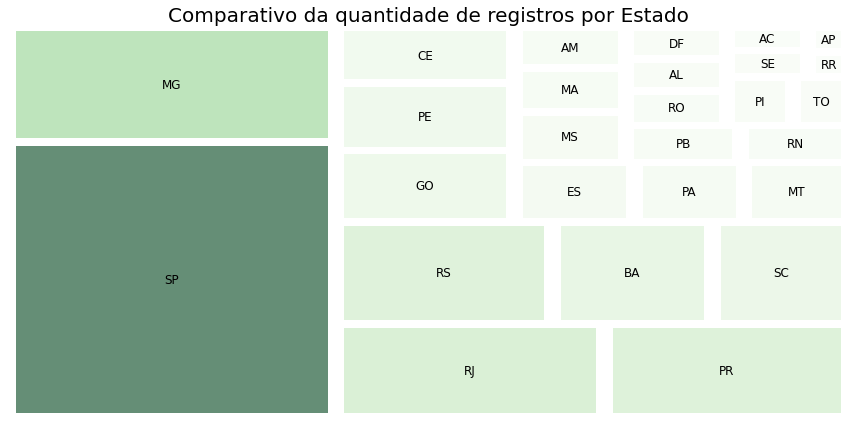

In [21]:
# Definindo o tamanho da figura
plt.figure(figsize=(12,6))

# Fazendo o Treemap
squarify.plot(sizes=df.sigla_uf.value_counts(), label=df.sigla_uf.value_counts().index,
              color=colors, pad=True, alpha=0.6, text_kwargs={'fontsize': 12});

# Adicionando um título
plt.title('Comparativo da quantidade de registros por Estado', fontsize=20)

# Removendo os eixos
plt.axis('off');

# Ajustando o gráfico
plt.tight_layout()


E como era de se esperar o estado de São Paulo lidera a concentração de combustível no país, mas é surpreendente o tamanho que ele está de Minas Gerais que vem logo em seguida, talvez no conjunto de dados completo, a diferença não seja tão grande, mas aqui estamos com uma amostra de dois milhões de registros 

In [22]:
df['unidade_medida'].unique()

array(['R$/litro', 'R$/13kg', 'R$/m3'], dtype=object)

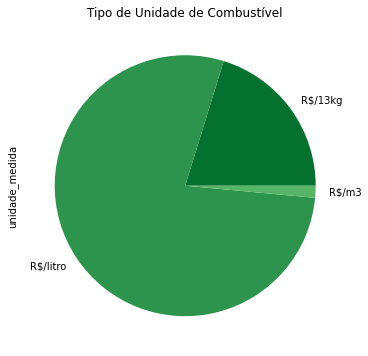

In [23]:
plt.figure(figsize=(12,6))
plt.title('Tipo de Unidade de Combustível')

ax = (df.unidade_medida.value_counts()/len(df)*100).sort_index().plot(kind="pie", rot=0)

E a forma mais usada para compra ou venda de combustivel, onde temos o preço por livro, mas há tambem a medida por metros cubicos que é usada principalmente com gnv e R$13kg que é mais usada com o gás que temos em nossa casa

In [24]:
top10_bandeira = df.bandeira_revenda.value_counts().head(10)
top10_bandeira = pd.DataFrame(top10_bandeira)
top10_bandeira = top10_bandeira.reset_index()
top10_bandeira.rename(columns={'index': 'Bandeira', 'bandeira_revenda': 'Quantidade de Registros'}, inplace= True)
top10_bandeira

,Bandeira,Quantidade de Registros
0,BRANCA,877051
1,PETROBRAS DISTRIBUIDORA S.A.,367598
2,IPIRANGA,197290
3,RAIZEN,158584
4,CBPI,96077
5,COSAN LUBRIFICANTES,77877
6,ALESAT,36572
7,LIQUIGÁS,20885
8,SABBÁ,11516
9,SP,8644


Os postos são chamados bandeira branca por não ser filiado a uma dessas famosas marcas internacionais ou nacionais como Shell, Petrobrás, Ipiranga, Ale. E, ele então, ou tem uma marca própria, ou não tem marca nenhuma. Ele simplesmente compra o etanol e os derivados de petróleo da refinaria ou do fornecedor que oferecer o melhor preço e qualidade.

In [25]:
# Agrupando o preço médio de vendas por ano
mean_comb_per_year = df.groupby('ano').mean('preco_venda').reset_index()
mean_comb_per_year

,ano,preco_venda
0,2004,5.495126
1,2005,5.918219
2,2006,6.561186
3,2008,9.537053
4,2009,9.684570
5,2010,10.158248
6,2012,11.249403
7,2013,11.716362
8,2014,11.970822
9,2018,15.819135


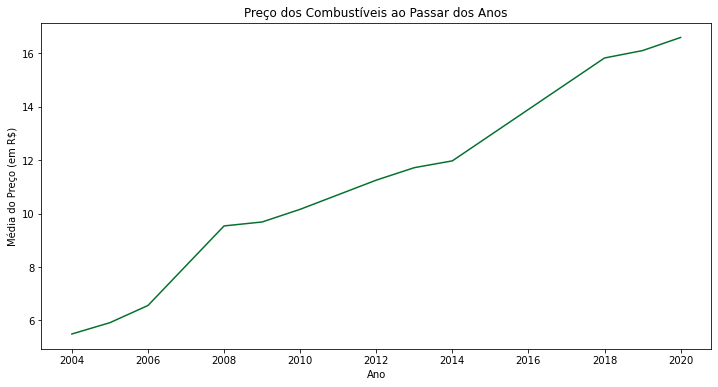

In [26]:
# Plotando a tabela acima 
plt.figure(figsize=(12,6))
plt.title('Preço dos Combustíveis ao Passar dos Anos')
plt.xlabel('Ano')
plt.ylabel('Média do Preço (em R$)')
plt.plot( mean_comb_per_year.ano, mean_comb_per_year.preco_venda)

Como podemos observar, conforme os anos vão passando, o preço dos combustíveis vai aumentando e um dos vários fatores para isso é a cotação no petroleo no mercado internacional

In [27]:
mean_comb_per_year['CrescimentoAnual'] = mean_comb_per_year.preco_venda.pct_change()

In [28]:
mean_comb_per_year

,ano,preco_venda,CrescimentoAnual
0,2004,5.495126,NaN
1,2005,5.918219,0.076994
2,2006,6.561186,0.108642
3,2008,9.537053,0.453556
4,2009,9.684570,0.015468
5,2010,10.158248,0.048911
6,2012,11.249403,0.107416
7,2013,11.716362,0.041510
8,2014,11.970822,0.021718
9,2018,15.819135,0.321474


Na tabela acima, temos o ano, o preço de venda em *MÉDIA* e o crescimento do preço em percentual conforme o passar dos anos e veja que a maior diferença na média foi do ano de 2007 pra 2008, seguido de 2014 pra 2016 (não sei dizer o motivo de não ter dados do ano de 2015)

In [29]:
mean_comb_per_uf = df.groupby(['ano', 'sigla_uf']).mean('preco_venda')
mean_comb_per_uf

preco_venda
ano  sigla_uf             
2004 AC           6.970496
     AL           3.349855
     AM           8.556344
     AP           5.178292
     BA           6.521564
...                    ...
2020 RS          20.260733
     SC          11.534054
     SE          15.255143
     SP          13.977258
     TO          31.528771

[324 rows x 1 columns]

E conforme fizemos anteriormente, na tabela acima temos um agrupamento por ano e por Estado, onde é possivel visualizar a média de todos os combustiveis em seus respectivos anos e Estados 

In [30]:
# Filtrando os dados onde sera obtido somente dados do estado de SP
dfSP = df.query('sigla_uf=="SP"')
dfSP

,ano,sigla_uf,id_municipio,bairro_revenda,cep_revenda,endereco_revenda,cnpj_revenda,nome_estabelecimento,bandeira_revenda,data_coleta,produto,unidade_medida,preco_venda,Regiao
2,2012,SP,3550308,PENHA,03631-000,"RUA GUAIAUNA,751",05.052.272/0001-59,AUTO POSTO CIDADE QUATRO LTDA,PETROBRAS DISTRIBUIDORA S.A.,2012-01-02,diesel s50,R$/litro,2.099,Sudeste
4,2012,SP,3530607,PONTE GRANDE,08775-000,"AVENIDA LOTHAR WALDEMAR HOENNE,1200",62.071.196/0001-62,AUTO POSTO MOGI DAS CRUZES LTDA,PETROBRAS DISTRIBUIDORA S.A.,2012-01-02,diesel s50,R$/litro,2.099,Sudeste
5,2012,SP,3530508,JARDIM GATOLANDIA,13731-000,"AVENIDA CHRISTOVAM LIMA GUEDES,1653",06.208.892/0001-05,AUTO POSTO IRMAOS VILA LTDA - EPP,BRANCA,2012-01-02,diesel s50,R$/litro,1.979,Sudeste
6,2012,SP,3530508,ZONA RURAL,13730-000,"RODOVIA SP 340,S/N KM 263",46.396.990/0001-20,AUTO POSTO MOCOCAO LTDA,PETROBRAS DISTRIBUIDORA S.A.,2012-01-02,diesel s50,R$/litro,1.979,Sudeste
23,2012,SP,3527108,CENTRO,16400-101,"RUA FLORIANO PEIXOTO,1435",02.787.519/0001-97,PIT STOP AUTO POSTO DE LINS LTDA,PETROBRAS DISTRIBUIDORA S.A.,2012-01-03,diesel s50,R$/litro,1.999,Sudeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999825,2020,SP,3552403,JARDIM SANTA MADALENA,13172-260,"AVENIDA IVO TREVISAN,698",02.810.037/0001-00,AUTO POSTO TREVISAN DE SUMARE LTDA,BRANCA,2020-02-19,diesel s10,R$/litro,3.699,Sudeste
1999828,2020,SP,3552403,JD MARACANA,13176-102,"AVENIDA CHICO MENDES,123",66.881.632/0001-10,POSTO DE SERVICO RAY LTDA,PETROBRAS DISTRIBUIDORA S.A.,2020-02-19,diesel s10,R$/litro,3.659,Sudeste
1999829,2020,SP,3552403,PARQUE ONGARO,13170-023,"AVENIDA REBOUCAS,3000",58.471.251/0001-34,AUTO POSTO PARQUE ONGARO LTDA,BRANCA,2020-02-19,diesel s10,R$/litro,3.749,Sudeste
1999975,2020,SP,3552403,JD BOM RETIRO,13181-622,"AVENIDA AUGUSTA DIOGO AYALAR,515",00.746.506/0001-44,POSTO PRACA LTDA,BRANCA,2020-02-19,diesel s10,R$/litro,3.499,Sudeste


In [31]:
# Agrupando o preço médio de SP por ano 
mean_comb_per_yearSP = dfSP.groupby('ano').mean('preco_venda').reset_index()
mean_comb_per_yearSP

,ano,preco_venda
0,2004,4.447784
1,2005,4.776756
2,2006,5.283907
3,2008,8.588243
4,2009,9.027568
5,2010,9.337572
6,2012,10.355560
7,2013,10.663173
8,2014,10.926078
9,2018,13.227549


In [32]:
mean_comb_per_yearSP['CrescimentoAnual'] = mean_comb_per_yearSP.preco_venda.pct_change()
mean_comb_per_yearSP

,ano,preco_venda,CrescimentoAnual
0,2004,4.447784,NaN
1,2005,4.776756,0.073963
2,2006,5.283907,0.106171
3,2008,8.588243,0.625358
4,2009,9.027568,0.051154
5,2010,9.337572,0.034340
6,2012,10.355560,0.109021
7,2013,10.663173,0.029705
8,2014,10.926078,0.024655
9,2018,13.227549,0.210640


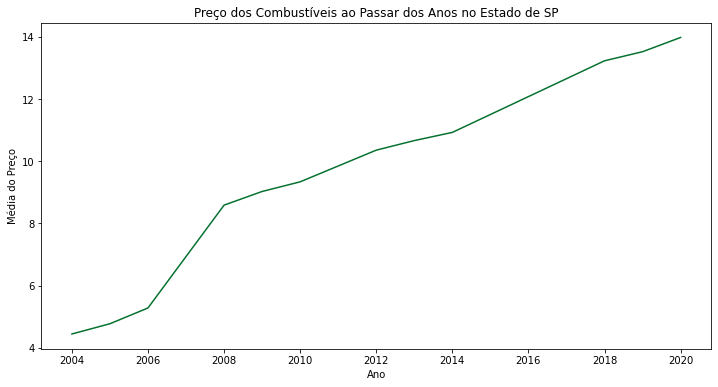

In [33]:
plt.figure(figsize=(12,6))
plt.title('Preço dos Combustíveis ao Passar dos Anos no Estado de SP')
plt.xlabel('Ano')
plt.ylabel('Média do Preço')
plt.plot( mean_comb_per_yearSP.ano, mean_comb_per_yearSP.preco_venda)

E novamente, observamos o crescimento do preço mas agora focado no estado de São Paulo

É possivel observar que dos anos 2012 à 2014 teve uma certa estabilidade no preço, e a mesma coisa aconteceu de 2018 à 2020, com preços mais elevados e estabilizados por assim dizer

In [34]:
# Agora filtramos os dados onde é vendido ou comprar por metros cubicos
dfm3 = df.query('unidade_medida=="R$/m3"')
dfm3

,ano,sigla_uf,id_municipio,bairro_revenda,cep_revenda,endereco_revenda,cnpj_revenda,nome_estabelecimento,bandeira_revenda,data_coleta,produto,unidade_medida,preco_venda,Regiao
406741,2018,BA,2927408,STIEP,41770-395,"RUA EDISTIO PONDE,474",34.274.233/0015-08,PETROBRAS DISTRIBUIDORA S.A.,PETROBRAS DISTRIBUIDORA S.A.,2018-01-02,gnv,R$/m3,2.370,Nordeste
406742,2018,SC,4205407,SACO GRANDE,88032-001,"RODOVIA VIRGILIO VARZEA,3033",09.633.776/0001-13,COMERCIO DE COMBUSTIVEIS E DERIVADOS DE PETROL...,PETROBRAS DISTRIBUIDORA S.A.,2018-01-02,gnv,R$/m3,2.099,Sul
406743,2018,SC,4205407,CENTRO,88020-302,"AVENIDA MAURO RAMOS,2010",00.108.775/0001-85,COLONIAL PRODUTOS E SERVICOS LTDA,IPIRANGA,2018-01-02,gnv,R$/m3,2.099,Sul
406744,2018,SC,4209102,SANTO ANTONIO,89218-112,"RUA DONA FRANCISCA,4725",82.614.363/0001-81,AUTO POSTO SOUZA LTDA,REJAILE,2018-01-02,gnv,R$/m3,1.950,Sul
406745,2018,SC,4209102,BUCAREIN,89202-210,"RUA PIAUI,480",05.659.692/0001-06,AUTO POSTO MONACO LTDA,IPIRANGA,2018-01-02,gnv,R$/m3,1.950,Sul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436358,2006,RJ,3304557,JACARE,20970-001,"RUA LINO TEIXEIRA,247",42.223.123/0001-31,POSTO VIANENSE DE PETROLEO LTDA,RAIZEN,2006-01-24,gnv,R$/m3,1.139,None
436359,2006,RJ,3304557,TIJUCA,20260-300,"RUA FELIX DA CUNHA,71",42.118.646/0001-18,POSTO DE GASOLINA E AUTO SERVICO FANTASMINHA LTDA,ALE COMBUSTÍVEIS,2006-01-24,gnv,R$/m3,1.139,None
436360,2006,RS,4309209,COHAB C,94030-001,"AVENIDA DORIVAL CANDIDO LUZ DE OLIVEIRA,2029",96.735.022/0006-83,AUTO SERVICO LINDOLFO COLLOR LTDA,CBPI,2006-01-24,gnv,R$/m3,1.529,Sul
436361,2006,ES,3205309,JARDIM CAMBURI,29090-100,"RUA GELU VERVLOET DOS SANTOS,1150",31.709.116/0001-28,POSTO CAMBURI DO GAS LTDA,PETROBRAS DISTRIBUIDORA S.A.,2006-01-24,gnv,R$/m3,1.200,Sudeste


In [35]:
# E podemos observar que somente o gnv é vendido nessas condiçoes
dfm3.produto.unique()

array(['gnv'], dtype=object)

In [36]:
# Novamente filtrando os dados onde a unidade de medida de compra ou venda usada é R$/13kg
df13kg = df.query('unidade_medida=="R$/13kg"')
df13kg.head(5)

,ano,sigla_uf,id_municipio,bairro_revenda,cep_revenda,endereco_revenda,cnpj_revenda,nome_estabelecimento,bandeira_revenda,data_coleta,produto,unidade_medida,preco_venda,Regiao
2130,2018,SC,4205407,JOAO PAULO,88030-300,"RODOVIA JOAO PAULO,305",07.152.185/0001-07,DIEGO MENA MACUCO,BRANCA,2018-01-02,glp,R$/13kg,70.0,Sul
2131,2018,SC,4205407,TRINDADE,88036-400,"RUA LUIZ OSCAR DE CARVALHO,128",08.067.561/0001-10,VALDINEI PORFIRIO ME,BRANCA,2018-01-02,glp,R$/13kg,60.0,Sul
2132,2018,SC,4205407,SACO DOS LIMOES,88045-600,"RUA ALDO ALVES,167",06.087.004/0001-35,XANDE COMERCIO DE AGUA E GAS LTDA ME,BRANCA,2018-01-02,glp,R$/13kg,65.0,Sul
2133,2018,SC,4205407,RIO TAVARES,88048-300,"RODOVIA DOUTOR ANTONIO LUIZ MOURA GONZAGA,3976",14.001.591/0001-26,PORTO GÁS LTDA,BRANCA,2018-01-02,glp,R$/13kg,65.0,Sul
2134,2018,SC,4205407,RIO TAVARES,88048-301,"RODOVIA DOUTOR ANTONIO LUIZ MOURA GONZAGA,2316",18.226.372/0001-04,MAGALHÃES & DIAS COMERCIO LTDA - EPP,BRANCA,2018-01-02,glp,R$/13kg,64.0,Sul


In [37]:
# E como foi visto com o gnv, somente o glp ou Gás de Cozinha é vendido nessas condições 
df13kg.produto.unique()

array(['glp'], dtype=object)

In [38]:
# E como fizemos anteriormente, agora iremos ver o percentual do Crescimento do Preço do Gás de Cozinha 
Gas_Cozinha_mean_preco = df13kg.groupby('ano').mean('preco_venda').reset_index()
Gas_Cozinha_mean_preco['CrescimentoAnual'] = Gas_Cozinha_mean_preco.preco_venda.pct_change()
Gas_Cozinha_mean_preco

,ano,preco_venda,CrescimentoAnual
0,2004,30.331737,NaN
1,2005,30.333365,0.000054
2,2006,30.943161,0.020103
3,2008,33.257369,0.074789
4,2009,33.767193,0.015330
5,2010,38.618531,0.143670
6,2012,39.490436,0.022577
7,2013,40.692790,0.030447
8,2014,42.919307,0.054715
9,2018,68.064364,0.585868


E como podemos observar atualmente, o preço do Gás está bem elevado, com uma média de R$70 e isso se deve ao custo do petróleo no mercado internacional, que é negociado em dólar. Com o preço do petróleo e a cotação do dólar nas alturas, o gás acaba encarecendo também.

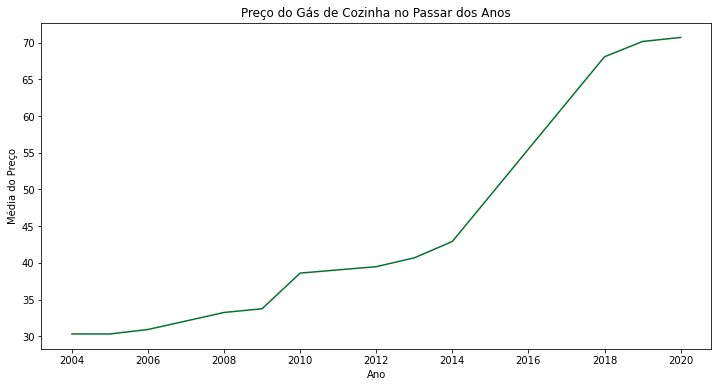

In [39]:
plt.figure(figsize=(12,6))
plt.title('Preço do Gás de Cozinha no Passar dos Anos')
plt.xlabel('Ano')
plt.ylabel('Média do Preço')
plt.plot( Gas_Cozinha_mean_preco.ano, Gas_Cozinha_mean_preco.preco_venda)

E como vimos com todos os combustiveis em geral, o preço do gás de cozinha também sofreu um reajusto como não há dados de 2016, 17, 18, não é possível análisar o que poderia ter colaborado com o aumento do preço do gás, além a influência do dolar

## Conclusão

- Pudemos observar que com o passar dos anos, o aumento da demanda em diversas regiões do país, tendo como possível motivo o aumento populacional e o aumento do poder de compra de veículos (quando referido a combustível). Consequentemente através da demanda, o valor de redistribuição e venda se elevou, influenciando-se também por questões econômicas internacionais.
- Em todos os dados, pudemos constatar significantes aumentos dentre os períodos de 2008 e 2010, nos quais são períodos que se destacam com o aumento acima da média. Anos posteriores, seguiram a influencia de crescimento tanto em questão de demanda, quanto de venda.